In [267]:
import tkinter as tk
from tkinter import filedialog as fd
import cv2 as cv
import numpy as np
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer

CHUẨN BỊ DỮ LIỆU

In [268]:
# Tải dữ liệu MNIST và chia thành tập huấn luyện và tập kiểm tra
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Chuẩn hóa dữ liệu và chuyển đổi nhãn thành one-hot encoding
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [269]:
class Canvas():
    
    def __init__(self,window):
        self.window = window
        #CANVAS 1
        self.canvas1 = tk.Canvas(self.window, width=600, height=500, bg='white')
        self.canvas1.create_rectangle(2, 3, 597, 495, outline='black', width=2)
        self.canvas1.create_line(5, 50, 595, 50, fill="black", width=2)
        self.canvas1.create_text(350,25,text="PHÂN LOẠI CHỮ SỐ VIẾT TAY",font=("Arial", 25))
        self.canvas1.place(x=0,y=0)
        #CANVAS 2 
        self.canvas2 = tk.Canvas(self.window, width=300, height=400, bg='white')
        self.canvas2.create_rectangle(5,3,295,395,outline='black',width=2)
        self.canvas2.place(x=600,y=102)
        #CANVAS 3 
        self.canvas3 = tk.Canvas(self.window, width=300, height=100, bg='white')
        self.canvas3.create_rectangle(5,3,295,95,outline='black',width=2)
        self.canvas3.create_text(50,30,text="Predict: ",font=("Time New Roman", 15))
        self.canvas3.create_text(72,80,text="Ground Truth: ",font=("Time New Roman", 15))
        self.canvas3.place(x=600,y=0)

    def __init__1(self):
        self.canvas1 = tk.Canvas(self.window, width=600, height=500, bg='white')
        self.canvas1.create_rectangle(2, 3, 597, 495, outline='black', width=2)
        self.canvas1.create_text(350,25,text="PHÂN LOẠI CHỮ SỐ VIẾT TAY",font=("Arial", 25))
        self.canvas1.place(x=0,y=0)
        self.canvas1.create_line(5, 50, 595, 50, fill="black", width=2)
        
        self.canvas3 = tk.Canvas(self.window, width=300, height=100, bg='white')
        self.canvas3.create_rectangle(5,3,295,95,outline='black',width=2)
        self.canvas3.create_text(50,30,text="Predict: ",font=("Time New Roman", 15))
        self.canvas3.create_text(72,80,text="Ground Truth: ",font=("Time New Roman", 15))
        self.canvas3.place(x=600,y=0)
    def clear_console(self):
        self.canvas1.delete('all')
        self.canvas3.delete('all')
        self.__init__1()
        
    def getCanvas3(self):
        return self.canvas3
    def getCanvas1(self):
        return self.canvas1

In [270]:
from matplotlib import pyplot as plt
def choose_image(window,canvas,Labels):
    try:
        path = fd.askopenfilename(filetypes=[("Image Files", "*.png;*.jpg;*.jpeg")])
        model = load_model("train.keras")
        img = image = cv.imread(path,cv.COLOR_BGR2GRAY)
        if image is None:
            return
        canvas.clear_console()
        canvas3 =canvas.getCanvas3()
        if "Anh" in path: img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
        img = cv.resize(img,(28,28)).astype('float32') / 255
        plt.imshow(img)
        plt.show()
        print(img.shape)
        predictLabel = np.argmax(model.predict(img.reshape(1,28,28),verbose=0))
        canvas3.create_text(150,30,text=str(predictLabel),font=("Time New Roman", 15))
        if "Anh" not in path: 
            index = int(path.split("img")[-1].split(".")[0])
            truthLabel = np.argmax(Labels[index])
            canvas3.create_text(150,80,text=str(truthLabel),font=("Time New Roman", 15))
        img = Image.fromarray(cv.cvtColor(image,cv.COLOR_BGR2RGB))
        img = img.resize((585, 432), Image.LANCZOS)
        img=ImageTk.PhotoImage(img)
        panel = tk.Label(window, image=img)
        panel.image = img
        panel.place(x=4,y=55)
    except:
        return

In [271]:
from scipy import sparse
import random
class agent:
    def __init__(self,train_images,train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
        self.numOfAction = 10
        self.size_batch = 60000
        self.epsilon = 0.05
        self.apha = 0.1
    def neural_network(self):
        model = Sequential()
        model.add(Flatten(input_shape=(28, 28))) 
        model.add(Dense(128, activation='relu'))
        model.add(Dense(10))
        model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
        return model
    def predict(self,image):
        if self.model ==None:
            self.model = load_model("train.keras")
        action = np.argmax(self.model.predict(image.reshape(1,28,28),verbose = 0))
        return action
    def get_reward(self,action,index):
        #dùng index thay cho state để lấy trạng thái
        predict_number = action
        reward = -1
        if predict_number == np.argmax(self.train_labels[index]):
            reward = 1
        return reward
    def train(self):
        self.model = self.neural_network()
        for i in range(20):
            States = np.zeros((self.size_batch,784))
            for index in range(self.size_batch):
                States[index]= self.train_images[index].reshape(1,784)
            qTable = self.model.predict(States.reshape(self.size_batch,28,28),verbose = 0)
            for index in range(self.size_batch):
                if random.uniform(0, 1) < self.epsilon:
                    action = np.random.randint(0,10)
                else:
                    action = np.argmax(qTable[index])
                reward = self.get_reward(action,index)
                if reward ==-1:
                    qTable[index,action] = reward*(1-self.apha)+self.apha*qTable[index,action]
                else: qTable[index,action] = reward
            States = States.reshape(self.size_batch,28,28)
            self.model.fit(States,qTable,epochs = 1,batch_size = 100,verbose=0)
        self.model.save("train.keras")
                

In [272]:
def train(canvas):
    canvas.clear_console()
    canvas1 = canvas.getCanvas1()
    canvas1.create_text(250,250,text = "Training ....",font =("Time New Roman", 20) )
    ag = agent(train_images,train_labels)
    ag.train()
    canvas.clear_console()
    canvas1 = canvas.getCanvas1()
    canvas1.create_text(250,250,text = "Finished",font =("Time New Roman", 20) )
    

In [273]:
class interface():
    def __init__(self):
        self.window = tk.Tk()
        self.window.geometry("900x550")
        self.window.title("PHÂN LOẠI CHỮ VIẾT TAY")
        
        self.canvas= Canvas(self.window)

        self.button1 = tk.Button(self.window,text="    Training    ",command=lambda: train(self.canvas))
        self.button1.place(x=720 ,y=300)

        self.button2 = tk.Button(self.window,text="    Choose Image    ",command=lambda: choose_image(self.window,self.canvas,test_labels))
        self.button2.place(x=200 ,y=510)

        self.button3 = tk.Button(self.window,text="    Clear    ",command=lambda: self.canvas.clear_console())
        self.button3.place(x=725 ,y=370)

        self.button4 = tk.Button(self.window,text="    EXIT    ",command= lambda:self.close())
        self.button4.place(x=730,y=450)

        # Chạy vòng lặp chính
        self.window.mainloop()
    def close(self):
        self.window.destroy()

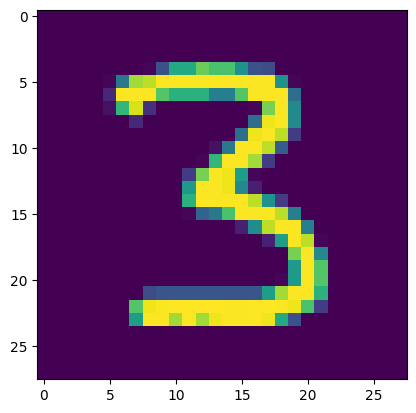

(28, 28)


In [274]:
if __name__== '__main__':
    interface()